In [332]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

import random

In [333]:
train_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

display(df_train)
display(df_test)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.9700,202307,26,5,1987,...,직영,4858.00,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0
1,서울특별시 강남구 개포동,651-1,651.0,1.0,개포더샵트리에,108.2017,202308,15,10,2021,...,위탁,2724.46,305.0,의무,2022-02-23 13:01:10.0,Y,N,127.056394,37.484892,2022-02-23 11:05:05.0
2,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,161.0000,202307,28,15,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
3,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,133.4600,202308,10,14,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
4,서울특별시 강남구 개포동,652,652.0,0.0,개포우성3차,104.4300,202308,18,6,1984,...,위탁,61064.24,419.0,의무,1984-12-22 00:00:00.0,Y,N,127.055990,37.483894,2013-03-07 09:46:28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6500,202307,19,13,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9268,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.6200,202307,25,12,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9269,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.6500,202308,27,12,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0
9270,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.9400,202309,2,18,2014,...,위탁,14171.00,1568.0,의무,2015-09-09 15:30:27.0,Y,N,127.106720,37.618870,2014-09-01 13:05:03.0


In [334]:
# train 데이터셋과 test 데이터셋 합치기
# 합쳐서 전처리하면 전처리하기 용이하다는 장점이 있지만 미래 데이터를 보는 것이기 때문에 Data Leakage 문제가 발생할 수 있으므로 목적과 상황에 맞게 판단해서 사용.
df_train['is_test'] = 0
df_test['is_test'] = 1

df_all = pd.concat([df_train, df_test])
df_all.shape

(1128094, 53)

In [335]:
df_all.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', 'is_test'],
      dtype='object')

In [336]:
# 컬러명 단순화 - 'k'제거
for col in df_all.columns:
    if 'k' in col:
        name = col.split('-')[1]
        df_all = df_all.rename(columns={col: name})

In [337]:
# 컬럼명 단순화 - ㎡ 제거
df_all = df_all.rename(columns={'전용면적(㎡)':'전용면적'})
df_all = df_all.rename(columns={'전용면적별세대현황(60㎡이하)':'전용면적별세대현황(60이하)'})
df_all = df_all.rename(columns={'전용면적별세대현황(60㎡~85㎡이하)':'전용면적별세대현황(60~85이하)'})
df_all = df_all.rename(columns={'85㎡~135㎡이하':'85~135이하'})
df_all = df_all.rename(columns={'135㎡초과':'135초과'})

In [338]:
# 회의에서 제거하기로한 컬럼들 제거
del_cols = ['전화번호', '팩스번호', '사용검사일', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일',
            '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지소개기존clob', '홈페이지', '등록일자']

selected_cols = [col for col in df_all.columns if col not in del_cols]
assert len(df_all.columns) == len(del_cols) + len(selected_cols)

In [339]:
df_selec = df_all[selected_cols]
df_selec.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '단지분류(아파트,주상복합등등)', '세대타입(분양형태)', '관리방식', '복도유형', '난방방식', '전체동수',
       '전체세대수', '건설사(시공사)', '시행사', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황(60이하)', '전용면적별세대현황(60~85이하)', '85~135이하', '135초과', '수정일자',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '좌표X', '좌표Y', 'target',
       'is_test'],
      dtype='object')

In [340]:
print(f"컬럼 제거 후 최종 데이터 형태 : {df_selec.shape}")

컬럼 제거 후 최종 데이터 형태 : (1128094, 35)


In [341]:
# 시군구명을 '시', '군', '구'로 변환
df_selec['시'] = df_selec['시군구'].apply(lambda x : x.split()[0])
df_selec['군'] = df_selec['시군구'].apply(lambda x : x.split()[1])
df_selec['구'] = df_selec['시군구'].apply(lambda x : x.split()[2])
del df_selec['시군구']

In [342]:
df_selec.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도', '도로명',
       '단지분류(아파트,주상복합등등)', '세대타입(분양형태)', '관리방식', '복도유형', '난방방식', '전체동수',
       '전체세대수', '건설사(시공사)', '시행사', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황(60이하)', '전용면적별세대현황(60~85이하)', '85~135이하', '135초과', '수정일자',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '좌표X', '좌표Y', 'target',
       'is_test', '시', '군', '구'],
      dtype='object')

In [343]:
df_selec = df_selec.rename(columns={'전용면적별세대현황(60이하)' : '전용면적별세대현황(18평이하)'})
df_selec = df_selec.rename(columns={'전용면적별세대현황(60~85이하)' : '전용면적별세대현황(18~25이하)'})
df_selec = df_selec.rename(columns={'85~135이하' : '25~40이하'})
df_selec = df_selec.rename(columns={'135초과' : '40초과'})

## 결측치 제거

In [344]:
df_selec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 37 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   번지                   1127867 non-null  object 
 1   본번                   1128019 non-null  float64
 2   부번                   1128019 non-null  float64
 3   아파트명                 1125958 non-null  object 
 4   전용면적                 1128094 non-null  float64
 5   계약년월                 1128094 non-null  int64  
 6   계약일                  1128094 non-null  int64  
 7   층                    1128094 non-null  int64  
 8   건축년도                 1128094 non-null  int64  
 9   도로명                  1128094 non-null  object 
 10  단지분류(아파트,주상복합등등)     250821 non-null   object 
 11  세대타입(분양형태)           251969 non-null   object 
 12  관리방식                 251969 non-null   object 
 13  복도유형                 251640 non-null   object 
 14  난방방식                 251969 non-null   object 
 15  전

In [345]:
# 결측치 비율
missing = (df_selec.isnull().sum() / len(df_selec)) * 100
missing = missing[missing > 0]
missing_cols = missing.index.tolist()
missing

번지                      0.020122
본번                      0.006648
부번                      0.006648
아파트명                    0.189346
단지분류(아파트,주상복합등등)       77.765949
세대타입(분양형태)             77.664184
관리방식                   77.664184
복도유형                   77.693348
난방방식                   77.664184
전체동수                   77.760098
전체세대수                  77.664184
건설사(시공사)               77.798215
시행사                    77.815678
연면적                    77.664184
주거전용면적                 77.668173
관리비부과면적                77.664184
전용면적별세대현황(18평이하)       77.668173
전용면적별세대현황(18~25이하)     77.668173
25~40이하                77.668173
40초과                   99.970836
수정일자                   77.668173
건축면적                   77.677835
주차대수                   77.677658
기타/의무/임대/임의=1/2/3/4    77.664184
좌표X                    77.673669
좌표Y                    77.673669
target                  0.821917
dtype: float64

In [346]:
non_missing_cols = [col for col in df_selec.columns if col not in missing_cols]
non_missing_cols
assert len(df_selec.columns) == len(missing_cols) + len(non_missing_cols)

In [347]:
missing.sort_values(ascending=False)

40초과                   99.970836
시행사                    77.815678
건설사(시공사)               77.798215
단지분류(아파트,주상복합등등)       77.765949
전체동수                   77.760098
복도유형                   77.693348
건축면적                   77.677835
주차대수                   77.677658
좌표X                    77.673669
좌표Y                    77.673669
주거전용면적                 77.668173
전용면적별세대현황(18평이하)       77.668173
전용면적별세대현황(18~25이하)     77.668173
25~40이하                77.668173
수정일자                   77.668173
관리방식                   77.664184
난방방식                   77.664184
세대타입(분양형태)             77.664184
전체세대수                  77.664184
기타/의무/임대/임의=1/2/3/4    77.664184
관리비부과면적                77.664184
연면적                    77.664184
target                  0.821917
아파트명                    0.189346
번지                      0.020122
본번                      0.006648
부번                      0.006648
dtype: float64

### 40초과 컬럼

In [348]:
display(df_selec[['전용면적', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '건축면적']][df_selec['40초과'].isnull() == True])
display(df_selec[['전용면적', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '건축면적']][df_selec['40초과'].isnull() == False])

,전용면적,연면적,주거전용면적,관리비부과면적,전용면적별세대현황(18평이하),전용면적별세대현황(18~25이하),25~40이하,40초과,건축면적
0,79.97,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
1,79.97,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
2,54.98,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
3,79.97,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
4,79.97,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,4858.0
...,...,...,...,...,...,...,...,...,...
9267,84.65,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0
9268,84.62,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0
9269,101.65,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0
9270,84.94,190866.0,93849.0,92808.0,808.0,504.0,90.0,NaN,14171.0


,전용면적,연면적,주거전용면적,관리비부과면적,전용면적별세대현황(18평이하),전용면적별세대현황(18~25이하),25~40이하,40초과,건축면적
93602,111.32,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
93603,111.32,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
93604,114.43,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
93605,114.43,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
93606,112.23,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
...,...,...,...,...,...,...,...,...,...
966270,101.91,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
966271,101.90,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
966272,101.91,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7
8906,101.90,84712.0,46154.0,38875.0,0.0,0.0,204.0,70.0,4209.7


In [349]:
df_selec[['전용면적', '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '전체세대수', '아파트명', '시', '군', '구']]

,전용면적,전용면적별세대현황(18평이하),전용면적별세대현황(18~25이하),25~40이하,40초과,전체세대수,아파트명,시,군,구
0,79.97,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
1,79.97,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
2,54.98,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
3,79.97,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
4,79.97,20.0,250.0,0.0,NaN,270.0,개포6차우성,서울특별시,강남구,개포동
...,...,...,...,...,...,...,...,...,...,...
9267,84.65,808.0,504.0,90.0,NaN,1402.0,신내우디안1단지,서울특별시,중랑구,신내동
9268,84.62,808.0,504.0,90.0,NaN,1402.0,신내우디안1단지,서울특별시,중랑구,신내동
9269,101.65,808.0,504.0,90.0,NaN,1402.0,신내우디안1단지,서울특별시,중랑구,신내동
9270,84.94,808.0,504.0,90.0,NaN,1402.0,신내우디안1단지,서울특별시,중랑구,신내동


In [350]:
len(df_selec['아파트명'].unique())

6550

In [351]:
null_under_18 = df_selec[df_selec['전용면적별세대현황(18평이하)'].isnull() == True]['아파트명'].unique().tolist()
null_18_to_25 = df_selec[df_selec['전용면적별세대현황(18~25이하)'].isnull() == True]['아파트명'].unique().tolist()
null_25_to_40 = df_selec[df_selec['25~40이하'].isnull() == True]['아파트명'].unique().tolist()
null_over_40 = df_selec[df_selec['40초과'].isnull() == True]['아파트명'].unique().tolist()

print(f"전용면적이 18평 이하이며 결측치 데이터인 아파트의 수 : {len(null_under_18)}")
print(f"전용면적이 18 ~ 25평 이하이며 결측치 데이터인 아파트의 수 : {len(null_18_to_25)}")
print(f"전용면적이 25 ~ 40평 이하이며 결측치 데이터인 아파트의 수 : {len(null_25_to_40)}")
print(f"전용면적이 40평 초과이며 결측치 데이터인 아파트의 수 : {len(null_over_40)}")

전용면적이 18평 이하이며 결측치 데이터인 아파트의 수 : 5867
전용면적이 18 ~ 25평 이하이며 결측치 데이터인 아파트의 수 : 5867
전용면적이 25 ~ 40평 이하이며 결측치 데이터인 아파트의 수 : 5867
전용면적이 40평 초과이며 결측치 데이터인 아파트의 수 : 6549


In [352]:
df_selec['impute_40'] = df_selec['전체세대수'] - (df_selec['전용면적별세대현황(18평이하)'] + df_selec['전용면적별세대현황(18~25이하)'] + df_selec['25~40이하'])
df_selec

,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,도로명,...,주차대수,기타/의무/임대/임의=1/2/3/4,좌표X,좌표Y,target,is_test,시,군,구,impute_40
0,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,...,262.0,임의,127.05721,37.476763,124000.0,0,서울특별시,강남구,개포동,0.0
1,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,언주로 3,...,262.0,임의,127.05721,37.476763,123500.0,0,서울특별시,강남구,개포동,0.0
2,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,언주로 3,...,262.0,임의,127.05721,37.476763,91500.0,0,서울특별시,강남구,개포동,0.0
3,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,언주로 3,...,262.0,임의,127.05721,37.476763,130000.0,0,서울특별시,강남구,개포동,0.0
4,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,언주로 3,...,262.0,임의,127.05721,37.476763,117000.0,0,서울특별시,강남구,개포동,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,신내역로1길 85,...,1568.0,의무,127.10672,37.618870,NaN,1,서울특별시,중랑구,신내동,0.0
9268,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,신내역로1길 85,...,1568.0,의무,127.10672,37.618870,NaN,1,서울특별시,중랑구,신내동,0.0
9269,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,신내역로1길 85,...,1568.0,의무,127.10672,37.618870,NaN,1,서울특별시,중랑구,신내동,0.0
9270,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,신내역로1길 85,...,1568.0,의무,127.10672,37.618870,NaN,1,서울특별시,중랑구,신내동,0.0


In [353]:
print(df_selec['impute_40'].isnull().sum() / len(df_selec) * 100)

77.6681730423174


### 복도유형

In [354]:
print('계단식')
display(df_selec[df_selec['복도유형'] == '계단식']['아파트명'].unique()[:5])
print('-' * 30)
print('혼합식')
display(df_selec[df_selec['복도유형'] == '혼합식']['아파트명'].unique()[:5])
print('-' * 30)
print('복도식')
display(df_selec[df_selec['복도유형'] == '복도식']['아파트명'].unique()[:5])
print('-' * 30)
print('타워형')
display(df_selec[df_selec['복도유형'] == '타워형']['아파트명'].unique()[:5])
print('-' * 30)
print('기타')
display(df_selec[df_selec['복도유형'] == '기타']['아파트명'].unique()[:5])

계단식


array(['개포6차우성', '개포자이', '개포주공1단지', '동양파라곤', '래미안대치하이스턴'], dtype=object)

------------------------------
혼합식


array(['개포우성3차', '개포주공6단지', '대치삼성', '대치현대', '도곡우성'], dtype=object)

------------------------------
복도식


array(['개포주공5단지', '마일스디오빌', '테헤란로대우아이빌', '은마', '한화진넥스빌'], dtype=object)

------------------------------
타워형


array(['아크로힐스논현', '강동역신동아파밀리에', '서초롯데캐슬프레지던트', '서울숲더샵', '정릉꿈에그린'],
      dtype=object)

------------------------------
기타


array(['대치효성', '롯데캐슬리베', '현대까르띠에710', '강동이루미', '태흥'], dtype=object)

In [355]:
df_selec['복도유형'].value_counts()

계단식    124964
혼합식     85513
복도식     38710
타워형      1371
기타       1082
Name: 복도유형, dtype: int64

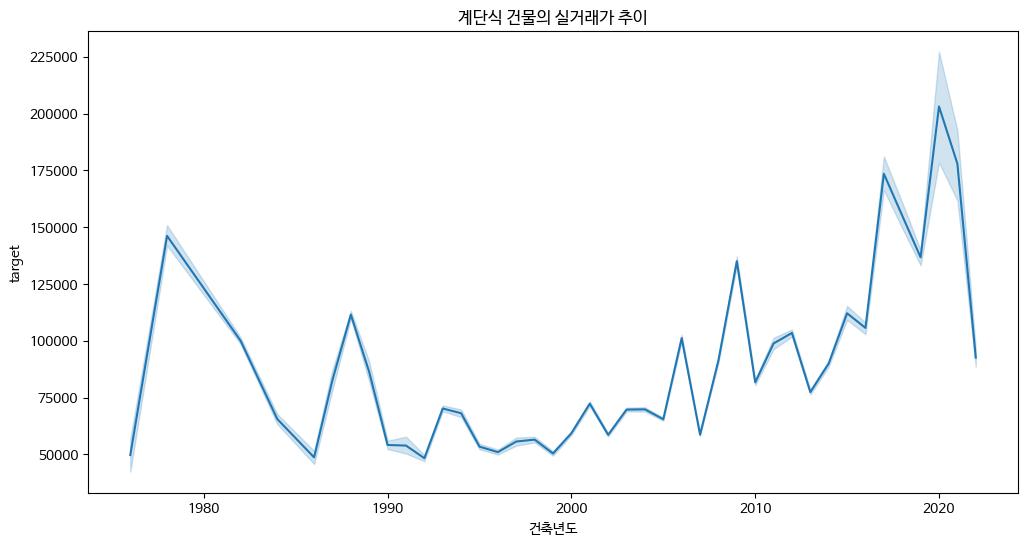

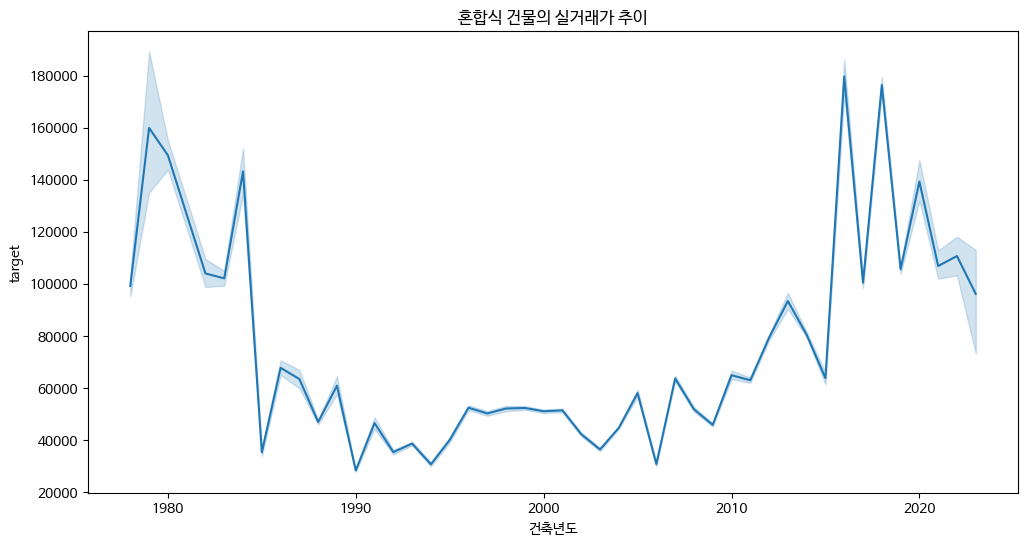

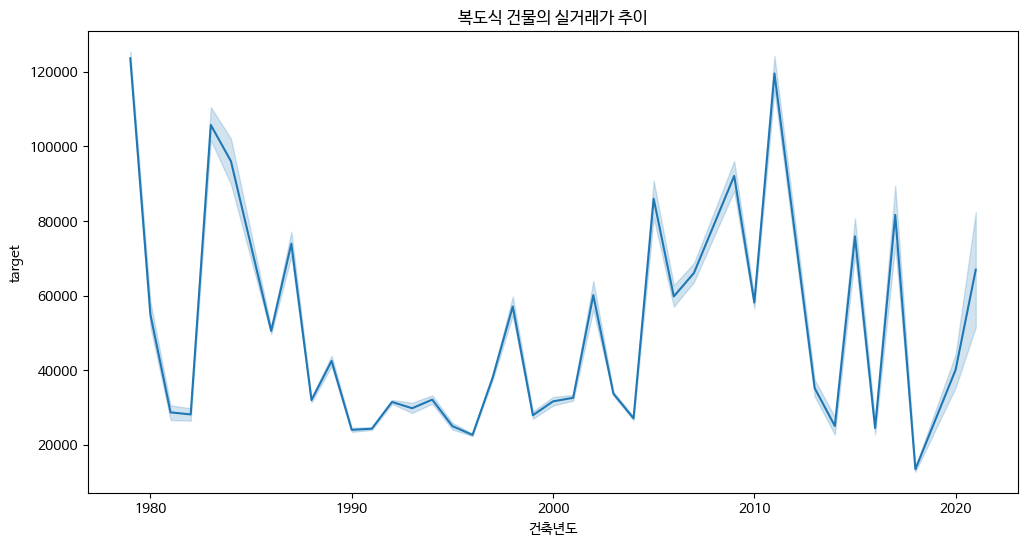

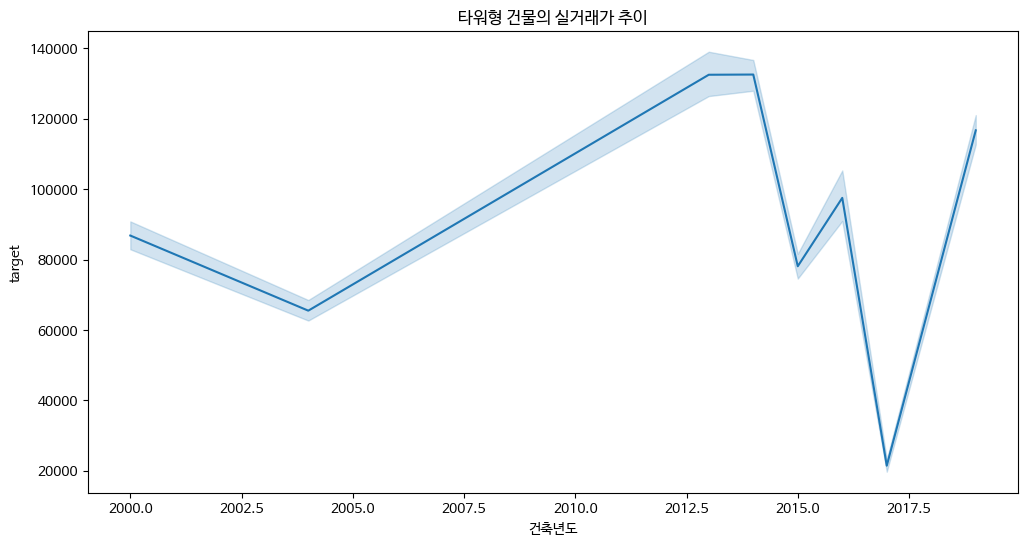

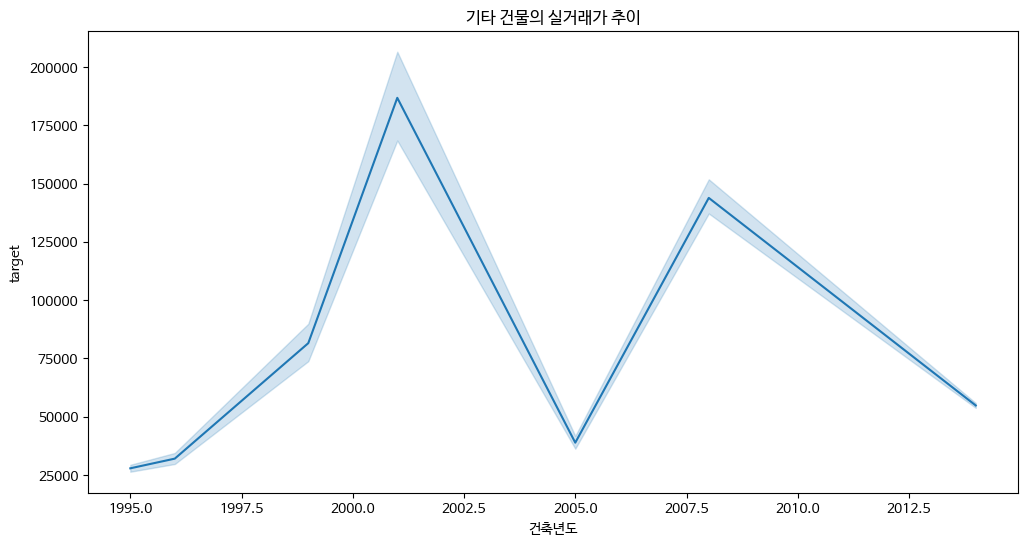

In [356]:
halls = ['계단식', '혼합식', '복도식', '타워형', '기타']
for i in range(5):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_selec[df_selec['복도유형'] == halls[i]], x='건축년도', y='target')
    plt.title(f"{halls[i]} 건물의 실거래가 추이")

plt.show()

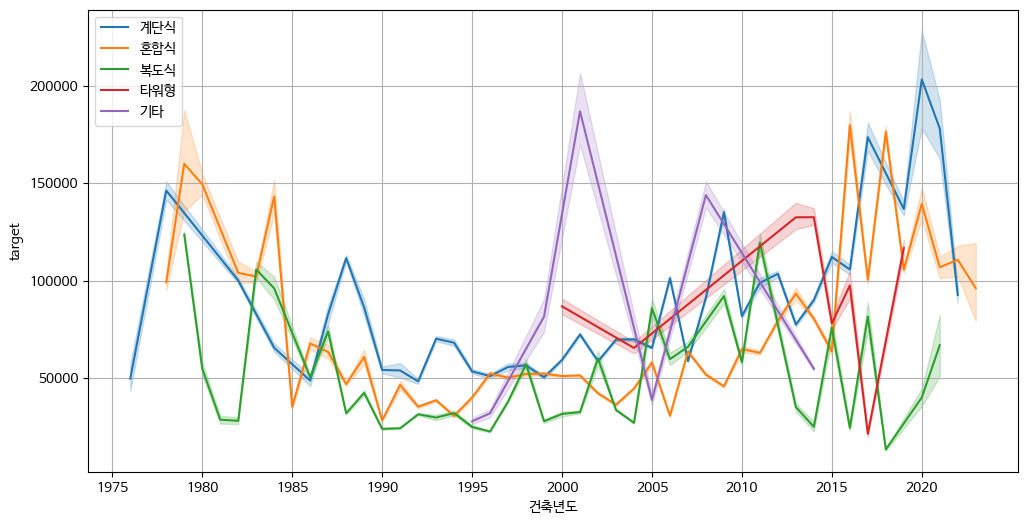

In [357]:
plt.figure(figsize=(12, 6))
plt.grid(True)
for i in range(5):
    sns.lineplot(data=df_selec[df_selec['복도유형'] == halls[i]], x='건축년도', y='target', label=halls[i])

plt.legend()
plt.xticks(range(1975, 2023, 5))
plt.show()

In [358]:
target_cols = []
without_cols = ['번지', '부번', '본번', '계약일', '도로명', 'target', 'is_test', '시', 'impute_40']

for col in df_selec.columns:
    if col not in without_cols:
        target_cols.append(col)

print(target_cols)

['아파트명', '전용면적', '계약년월', '층', '건축년도', '단지분류(아파트,주상복합등등)', '세대타입(분양형태)', '관리방식', '복도유형', '난방방식', '전체동수', '전체세대수', '건설사(시공사)', '시행사', '연면적', '주거전용면적', '관리비부과면적', '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '수정일자', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '좌표X', '좌표Y', '군', '구']


In [359]:
# 복도유형에 따른 결측치 패턴 확인하기
random_index = random.sample(df_selec[df_selec['복도유형'].isnull() == True].index.tolist(), 20)
df_selec[target_cols].iloc[random_index]

,아파트명,전용면적,계약년월,층,건축년도,"단지분류(아파트,주상복합등등)",세대타입(분양형태),관리방식,복도유형,난방방식,...,25~40이하,40초과,수정일자,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,좌표X,좌표Y,군,구
2909,래미안삼성2차,101.3800,201711,8,2007,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,삼성동
1069190,양평벽산블루밍,51.2400,200805,5,1990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,영등포구,양평동2가
656586,주공7,65.1600,201502,5,1983,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강동구,상일동
388868,현대,84.8100,202008,18,1994,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구,면목동
734895,문정대우푸르지오2차,84.8200,201410,13,2001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,문정동
119240,한강동원,84.8700,201209,5,2003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,마포구,합정동
631091,쌍용예가클래식,88.0200,201606,9,2010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,영등포구,당산동3가
118580,한화오벨리스크,75.7000,201203,34,2004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,마포구,도화동
860002,은천2단지,59.9300,201302,8,2000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,관악구,봉천동
356427,티에스프리우스,108.3400,202001,2,2004,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서초구,서초동


- '복도유형'의 결측치에 대한 패턴을 찾으려 하는데 전체 데이터의 78%가 결측치이다 보니 결측치에서 패턴을 찾기는 힘들것으로 예상
- '복도유형'의 결측치가 없는 데이터에서 패턴을 찾아 결측치를 어떻게 채울지 찾는 방향이 맞을 것 같다.

In [360]:
random_index = random.sample(df_selec[df_selec['복도유형'].notnull()].index.tolist(), 20)
df_selec[target_cols].iloc[random_index]

,아파트명,전용면적,계약년월,층,건축년도,"단지분류(아파트,주상복합등등)",세대타입(분양형태),관리방식,복도유형,난방방식,...,25~40이하,40초과,수정일자,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,좌표X,좌표Y,군,구
1067961,문래대림,59.960,200712,2,2000,아파트,분양,위탁관리,혼합식,개별난방,...,20.0,NaN,2023-09-26 12:46:00.0,2425.61,251.0,의무,126.888059,37.517020,영등포구,문래동5가
205674,e편한세상서울대입구1단지,59.900,202305,4,2019,아파트,기타,위탁관리,계단식,개별난방,...,56.0,NaN,2023-09-25 18:38:46.0,0.00,0.0,의무,126.943883,37.478692,관악구,봉천동
42595,창동주공1단지,49.940,201802,10,1990,아파트,분양,위탁관리,복도식,개별난방,...,0.0,NaN,2023-09-25 06:51:02.0,0.00,350.0,의무,127.039428,37.653442,도봉구,창동
14272,마곡금호어울림,84.948,201710,7,2005,아파트,분양,위탁관리,계단식,개별난방,...,30.0,NaN,2023-09-25 13:47:05.0,0.00,222.0,의무,126.837612,37.574624,강서구,마곡동
564788,라이프,84.380,201607,13,1996,아파트,분양,위탁관리,계단식,개별난방,...,22.0,NaN,2023-09-25 18:41:56.0,0.00,152.0,의무,126.913185,37.477110,관악구,신림동
868904,롯데캐슬루나,84.985,201305,12,2006,아파트,분양,위탁관리,계단식,개별난방,...,232.0,NaN,2023-09-25 07:22:22.0,11225.21,1153.0,의무,127.050760,37.625959,노원구,월계동
641983,용마한신,82.390,201510,5,1990,아파트,분양,자치관리,혼합식,개별난방,...,0.0,NaN,2023-09-23 08:16:22.0,0.00,175.0,의무,127.095429,37.581193,중랑구,면목동
509795,성수우방2차,59.820,201705,3,1999,아파트,분양,위탁관리,혼합식,개별난방,...,0.0,NaN,2023-09-23 06:31:44.0,0.00,221.0,의무,127.051583,37.548406,성동구,성수동2가
495765,흑석한강센트레빌,84.840,201706,9,2011,아파트,기타,위탁관리,혼합식,개별난방,...,126.0,NaN,2023-09-25 17:40:26.0,6834.84,834.0,의무,126.965281,37.506220,동작구,흑석동
432931,경남아너스빌,96.170,201906,17,2004,아파트,분양,위탁관리,계단식,지역난방,...,145.0,NaN,2023-09-26 11:23:49.0,0.00,0.0,의무,126.871512,37.518127,양천구,신정동


## '아파트명'에 따른 '복도유형' 패턴 탐색
    - '아파트명'의 결측치 : 2136개
    - 해당 2136개의 데이터는 버리고 '아파트명'에 따라 '복도유형'을 채우는 방법

In [361]:
df_selec[df_selec['복도유형'].isnull() == True]['아파트명']

975     개포주공4단지
976     개포주공4단지
977     개포주공4단지
978     개포주공4단지
979     개포주공4단지
         ...   
9253         한신
9254         한신
9255         한신
9256         한신
9257         한신
Name: 아파트명, Length: 876454, dtype: object

In [362]:
df_selec[df_selec['아파트명'] == '개포주공4단지']['복도유형'].value_counts()

Series([], Name: 복도유형, dtype: int64)

**DMC**

In [363]:
apt_null_dmc = df_selec[(df_selec['복도유형'].isnull()==True) & (df_selec['아파트명'].str.contains('DMC'))][target_cols]
display(apt_null_dmc)
print(f"DMC가 들어간 아파트 중 결측치의 갯수 : {len(apt_null_dmc)}")

,아파트명,전용면적,계약년월,층,건축년도,"단지분류(아파트,주상복합등등)",세대타입(분양형태),관리방식,복도유형,난방방식,...,25~40이하,40초과,수정일자,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,좌표X,좌표Y,군,구
54127,DMC파크뷰자이1단지,84.980,201710,10,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,남가좌동
54128,DMC파크뷰자이1단지,84.971,201710,21,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,남가좌동
54129,DMC파크뷰자이1단지,84.971,201710,28,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,남가좌동
54130,DMC파크뷰자이1단지,84.974,201710,16,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,남가좌동
54131,DMC파크뷰자이1단지,84.968,201710,14,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,남가좌동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5317,DMC한양,65.340,202307,4,1987,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,북가좌동
5318,DMC한양,116.760,202307,13,1987,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,북가좌동
5319,DMC한양,65.340,202307,9,1987,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,북가좌동
5320,DMC현대,59.910,202307,7,2000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서대문구,북가좌동


DMC가 들어간 아파트 중 결측치의 갯수 : 2561


In [364]:
df_selec[df_selec['아파트명'].str.contains('DMC', na=False)]['복도유형'].value_counts()

혼합식    3275
계단식    1444
Name: 복도유형, dtype: int64

In [365]:
print(3275 / (3275 + 1444))
print(1444 / (3275 + 1444))

0.6940029667302394
0.3059970332697605


**빌**

In [366]:
df_apt = df_selec[df_selec['아파트명'].notnull()]
df_apt[df_apt['아파트명'].apply(lambda x : x[-1] == '빌')]['복도유형'].value_counts()

계단식    6952
복도식    4754
혼합식    2167
타워형     185
Name: 복도유형, dtype: int64

In [367]:
df_selec[df_selec['아파트명'].str.contains('빌', na=False)]['아파트명'].value_counts()

경남아너스빌       4091
동부센트레빌       2520
한진한화그랑빌      2492
동아에코빌        1882
길음동동부센트레빌    1369
             ... 
보성리엔빌           1
포렛빌             1
하광엘피스빌          1
호원빌라            1
신용산빌딩           1
Name: 아파트명, Length: 1039, dtype: int64

In [368]:
df_selec[df_selec['아파트명'].str.contains('빌', na=False)]['복도유형'].value_counts()

계단식    7407
복도식    5050
혼합식    2458
타워형     185
Name: 복도유형, dtype: int64

In [369]:
df_selec[(df_selec['복도유형'].isnull()) & (df_selec['아파트명'].str.contains('빌'))][target_cols]

,아파트명,전용면적,계약년월,층,건축년도,"단지분류(아파트,주상복합등등)",세대타입(분양형태),관리방식,복도유형,난방방식,...,25~40이하,40초과,수정일자,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,좌표X,좌표Y,군,구
1063,뉴현대파크빌,79.2500,201711,4,2001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,개포동
1224,아람손프라자/비바빌,59.9600,201803,5,2001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,개포동
1311,논현베르빌,111.0800,201801,7,2002,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,논현동
1312,논현베르빌,111.3600,201801,7,2002,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,논현동
1313,논현베르빌,132.5900,201801,3,2002,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남구,논현동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,고덕골든빌,95.3100,202307,14,2012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구,묵동
9174,건영캐스빌,84.6475,202307,7,2006,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구,상봉동
9175,건영캐스빌,84.6475,202307,6,2006,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구,상봉동
9176,건영캐스빌,84.6475,202308,8,2006,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구,상봉동


## '전용면적'에 따른 '복도유형' 패턴 분석

    - 전용면적 크기에 따라 '복도유형'에 차이가 있지 않을까?

In [370]:
df_selec[df_selec['전용면적'].notnull()].groupby('복도유형')['전용면적'].mean()

복도유형
계단식     88.890946
기타      85.996387
복도식     56.383060
타워형    101.595031
혼합식     75.698884
Name: 전용면적, dtype: float64

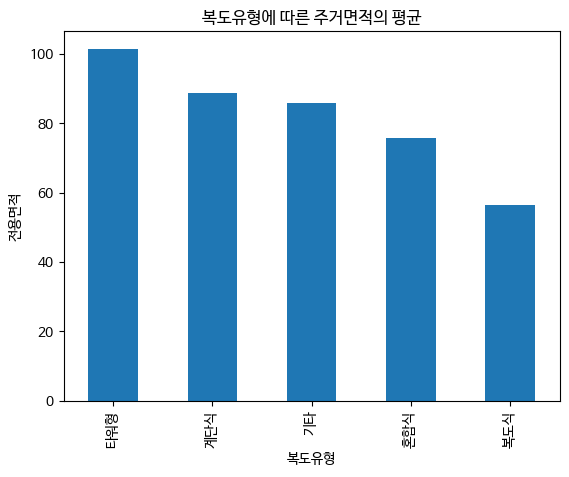

In [371]:
df_selec[df_selec['전용면적'].notnull()].groupby('복도유형')['전용면적'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("복도유형에 따른 주거면적의 평균")
plt.ylabel('전용면적')
plt.show()

In [372]:
print(f"복도유형이 기타인 데이터의 갯수 : {len(df_selec[df_selec['복도유형'] == '기타'])}")

복도유형이 기타인 데이터의 갯수 : 1082


- '기타'와 '계단식'의 전용면적이 비슷하므로 결측치가 '기타' 유형으로 들어간 것으로 가정하면 1000개의 '기타'유형 데이터를 '계단식'으로 변경하는 것이 가능하다.
- 그 뒤 '전용면적'의 구간별로 '복도유형'에 대한 결측치를 채우는 방법도 가능해 보인다.

## '계약년'에 따른 '복도유형'에 패턴이 있는지 파악

    - '계약년월일'을 '계약년', '계약월'로 분리

In [373]:
df_selec['계약년'] = df_selec['계약년월'].astype('str').apply(lambda x : x[:4]).astype(int)
df_selec['계약월'] = df_selec['계약년월'].astype('str').apply(lambda x : x[4:]).astype(int)
del df_selec['계약년월']

<Axes: xlabel='계약년,복도유형'>

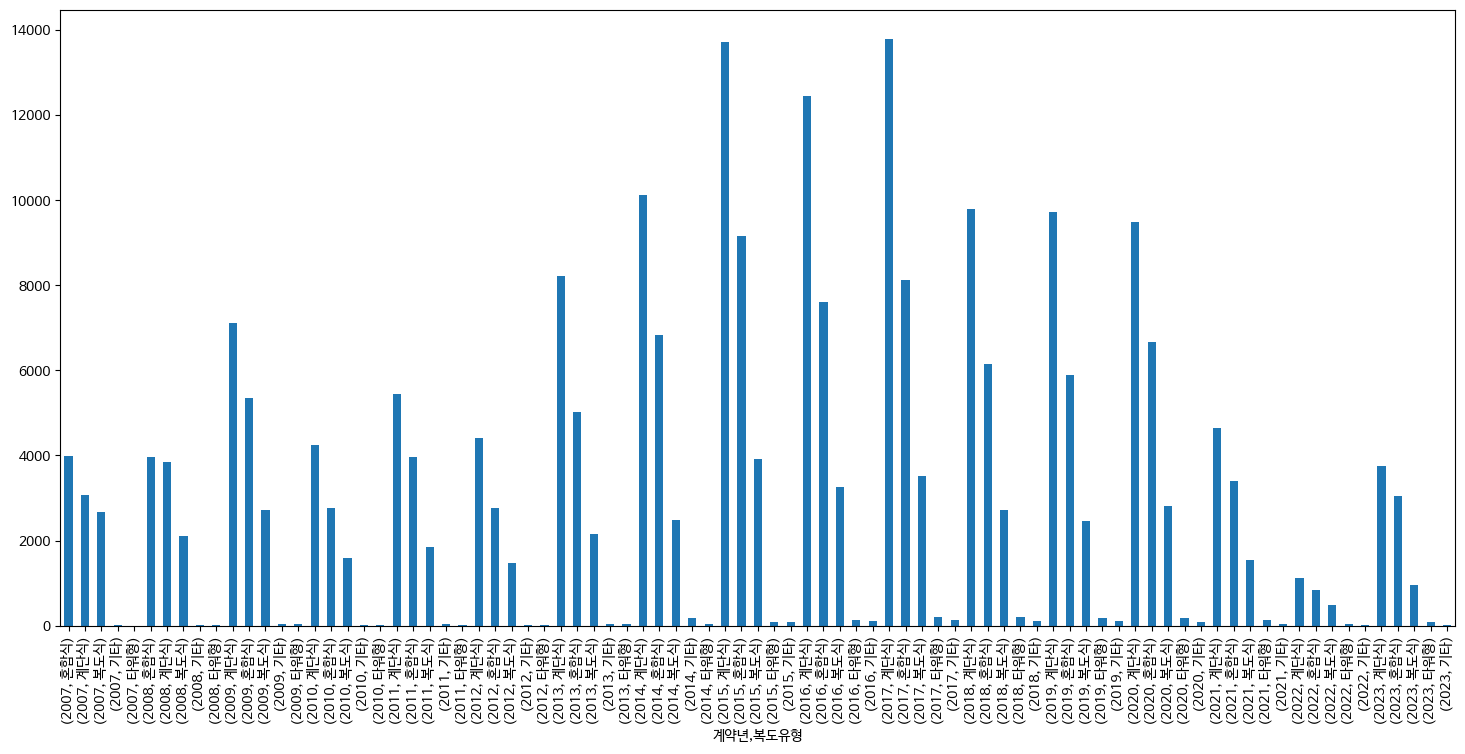

In [374]:
plt.figure(figsize=(18, 8))
df_selec.groupby('계약년')['복도유형'].value_counts().plot(kind='bar')

## '층'에 따른 '복도유형'의 패턴이 있는지 파악

    - 층에 음수로 되어있는 값인 이상치? 있음 (나중에 확인해서 처리 필요)

In [375]:
df_selec[df_selec['층'] < 1]['층'].value_counts()

-1    218
-2     31
-3     11
-4      4
Name: 층, dtype: int64

<Axes: xlabel='복도유형'>

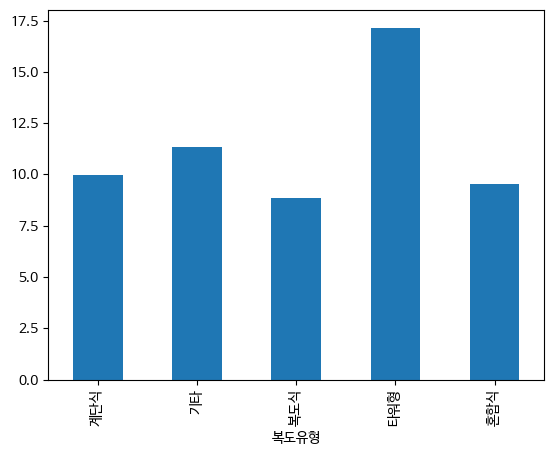

In [376]:
df_selec.groupby('복도유형')['층'].mean().plot(kind='bar')

## '건축년도'별 '복도유형'에 패턴이 있는지 파악

In [377]:
df_selec.groupby('복도유형')['건축년도'].mean()

복도유형
계단식    2004.332784
기타     2007.703327
복도식    1994.172410
타워형    2011.879650
혼합식    2001.507373
Name: 건축년도, dtype: float64

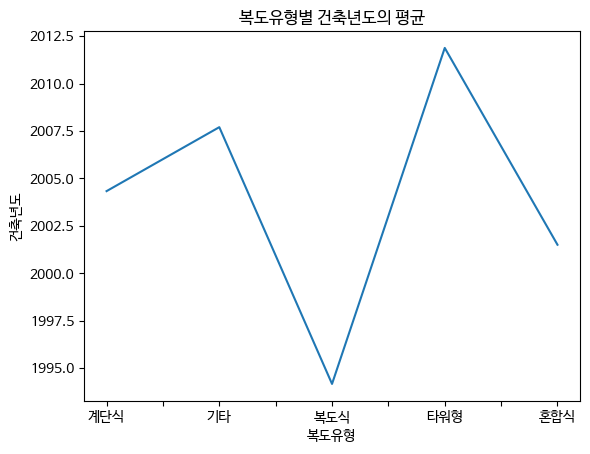

In [378]:
df_selec.groupby('복도유형')['건축년도'].mean().plot()
plt.title("복도유형별 건축년도의 평균")
plt.ylabel("건축년도")
plt.show()

In [379]:
df_selec['복도유형'].value_counts()

계단식    124964
혼합식     85513
복도식     38710
타워형      1371
기타       1082
Name: 복도유형, dtype: int64

## '단지분류'에 따른 '복도유형'의 패턴 파악

In [380]:
df_selec.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       '단지분류(아파트,주상복합등등)', '세대타입(분양형태)', '관리방식', '복도유형', '난방방식', '전체동수',
       '전체세대수', '건설사(시공사)', '시행사', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '수정일자',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '좌표X', '좌표Y', 'target',
       'is_test', '시', '군', '구', 'impute_40', '계약년', '계약월'],
      dtype='object')

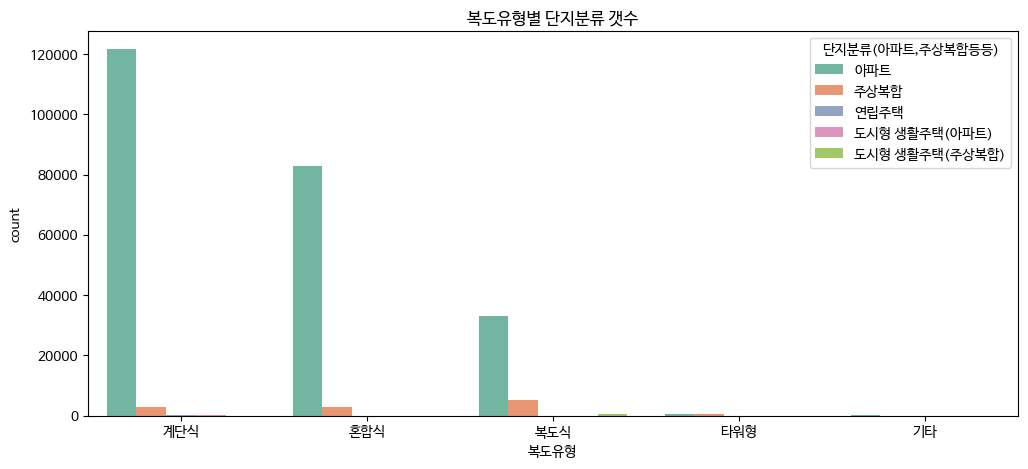

In [381]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_selec, x='복도유형', hue='단지분류(아파트,주상복합등등)', palette='Set2')
plt.title("복도유형별 단지분류 갯수")
plt.show()


## '복도유형' 결측치 채우기

    - '전용면적' 범위에 따라 우선 전용면적 값이 있지만 '복도유형' 값은 결측치인 경우에 대해 채워준다.
    - 나머지 결측치에 대해서는 '구'별 상위 2개의 '복도유형'에 대해서 비율에 맞게 채워주는 형식으로 진행.

**전용면적 이용해서 복도유형 결측치 채우기**

In [382]:
df_selec[df_selec['전용면적'].notnull()].groupby('복도유형')['전용면적'].mean()

복도유형
계단식     88.890946
기타      85.996387
복도식     56.383060
타워형    101.595031
혼합식     75.698884
Name: 전용면적, dtype: float64

In [383]:
# 복도유형중 기타를 계단식으로 바꾸기
df_selec.loc[df_selec['복도유형'] == '기타', '복도유형'] = '계단식'

In [385]:
print(f"복도유형 컬럼의 결측치 개수 : {df_selec['복도유형'].isnull().sum()}")

복도유형 컬럼의 결측치 개수 : 876454


In [401]:
df_selec['복도유형'].value_counts() / df_selec['복도유형'].value_counts().values.sum()

계단식    0.500898
혼합식    0.339823
복도식    0.153831
타워형    0.005448
Name: 복도유형, dtype: float64

In [441]:
df_selec.loc[(df_selec['전용면적'] <= 52) & (df_selec['복도유형'].isnull()==True), '복도유형'] = '복도식' # 143675
df_selec.loc[(df_selec['전용면적'] > 52) & (df_selec['전용면적'] <= 75) & (df_selec['복도유형'].isnull()==True), '복도유형'] = '혼합식' # 270946
df_selec.loc[(df_selec['전용면적'] > 75) & (df_selec['전용면적'] <= 130) & (df_selec['복도유형'].isnull()==True), '복도유형'] = '계단식' # 416447
df_selec.loc[(df_selec['전용면적'] > 130) & (df_selec['복도유형'].isnull()==True), '복도유형'] = '타워형' # 45356

In [442]:
df_selec['복도유형'].isnull().sum()

0

In [ ]:
# # 컬럼명 변경
# df_selec = df_selec.rename(columns={'구' : '동'})
# df_selec = df_selec.rename(columns={'군' : '구'})

# # '구'별 '복도유형' 출력
# for col in df_selec['구'].unique().tolist():
#     print(col)
#     df_gu_hallway = df_selec[df_selec['구'] == col]['복도유형'].value_counts()
#     display(df_gu_hallway)
#     ser_hallways = df_gu_hallway.index
#     ser_hallways_values = df_gu_hallway.values
#     print(f"{col}의 {ser_hallways[0]} 비율 : {ser_hallways_values[0] / (ser_hallways_values[0] + ser_hallways_values[1]):.2f}")
#     print(f"{col}의 {ser_hallways[1]} 비율 : {ser_hallways_values[1] / (ser_hallways_values[0] + ser_hallways_values[1]):.2f}")
#     print('-' * 50)

# # '구'별 '복도유형' 상위 2개
# dict_gu_hallway = {
#              '강남구' : {'계단식' : 0.73, '복도식' : 0.27},
#              '강동구' : {'혼합식' : 0.56, '계단식' : 0.44},
#              '강북구' : {'혼합식' : 0.74, '계단식' : 0.26},
#              '강서구' : {'계단식' : 0.71, '복도식' : 0.29},
#              '관악구' : {'혼합식' : 0.56, '계단식' : 0.44},
#              '광진구' : {'계단식' : 0.61, '혼합식' : 0.39},
#              '구로구' : {'혼합식' : 0.52, '계단식' : 0.48},
#              '금천구' : {'계단식' : 0.71, '혼합식' : 0.29},
#              '노원구' : {'복도식' : 0.53, '계단식' : 0.47},
#              '도봉구' : {'복도식' : 0.63, '혼합식' : 0.37},
#              '동대문구' : {'계단식' : 0.55, '혼합식' : 0.45},
#              '동작구' : {'계단식' : 0.54, '혼합식' : 0.46},
#              '마포구' : {'계단식' : 0.63, '혼합식' : 0.37},
#              '서대문구' : {'혼합식' : 0.58, '계단식' : 0.42},
#              '서초구' : {'계단식' : 0.74, '혼합식' : 0.26},
#              '성동구' : {'계단식' : 0.68, '혼합식' : 0.32},
#              '성북구' : {'계단식' : 0.60, '혼합식' : 0.40},
#              '송파구' : {'계단식' : 0.63, '혼합식' : 0.37},
#              '양천구' : {'복도식' : 0.59, '계단식' : 0.41},
#              '영등포구' : {'계단식' : 0.56, '혼합식' : 0.44},
#              '용산구' : {'혼합식' : 0.53, '계단식' : 0.47},
#              '은평구' : {'계단식' : 0.71, '혼합식' : 0.29},
#              '종로구' : {'계단식' : 0.80, '복도식' : 0.20},
#              '중구' : {'계단식' : 0.56, '복도식' : 0.44},
#              '중랑구' : {'혼합식' : 0.65, '계단식' : 0.35}
#              }

In [444]:
df_selec.columns

Index(['번지', '본번', '부번', '아파트명', '전용면적', '계약일', '층', '건축년도', '도로명',
       '단지분류(아파트,주상복합등등)', '세대타입(분양형태)', '관리방식', '복도유형', '난방방식', '전체동수',
       '전체세대수', '건설사(시공사)', '시행사', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황(18평이하)', '전용면적별세대현황(18~25이하)', '25~40이하', '40초과', '수정일자',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '좌표X', '좌표Y', 'target',
       'is_test', '시', '군', '구', 'impute_40', '계약년', '계약월'],
      dtype='object')

In [445]:
del df_selec['impute_40']

In [446]:
train = df_selec[df_selec['is_test'] == 0]
test = df_selec[df_selec['is_test'] == 1]

In [449]:
del train['is_test']
del test['is_test']
del test['target']

In [450]:
display(train.shape)
display(test.shape)

(1118822, 37)

(9272, 36)

In [462]:
train_path = '../data/interim/fill_hallway_train.csv'
test_path = '../data/interim/fill_hallway_test.csv'
train.to_csv(train_path, index=False)
test.to_csv(test_path, index=False)